# Linear Regression

See basic example here:
> http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

and full documentation of the linear_model module here:
> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Setup

In [1]:
# to display graphs in this notebook
%matplotlib inline

import numpy.random # for generating a noisy data set
from sklearn import linear_model # for model fitting/training
from  sklearn.linear_model import Lasso 
import matplotlib.pyplot # for plotting in general
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

In [4]:
def print_model_fit(model):
    # Print out the parameters for the best fit line
    print('Intercept: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_))

    # Print out the model's guesses for some values of x
    datapoints = [[-1],[0],[1]]
    predictions = model.predict(datapoints)
    for datapoint, prediction in zip(datapoints, predictions):
        print('Model prediction for {}: {}'.format(datapoint[0], prediction))

def graph_one_input_model(model, x_1d, y):
    # create the figure
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('Data and Best-Fit Line')
    matplotlib.pyplot.xlabel('x')
    matplotlib.pyplot.ylabel('y')

    # put the generated dataset points on the graph
    matplotlib.pyplot.scatter(x_1d, y)

    # predict for inputs along the graph to find the best-fit line
    X = numpy.linspace(-10, 100)
    Y = model.predict(list(zip(X)))
    matplotlib.pyplot.plot(X, Y)

### Dataset 2

This dataset still just has one input, so the code is very similar to our first one. However, now the generating function is quadratic, so this one will be trickier to deal with.

Again, we'll go through dataset generation, training, and visualization.

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Intercept: 24.710268511614316  Coefficients: [-0.9446796]
Model prediction for -1: 25.654948109652032
Model prediction for 0: 24.710268511614316
Model prediction for 1: 23.7655889135766
Intercept: 1.0901835426230377  Coefficients: [0.71205646]
Model prediction for -1: 0.37812707896915376
Model prediction for 0: 1.0901835426230377
Model prediction for 1: 1.8022400062769217


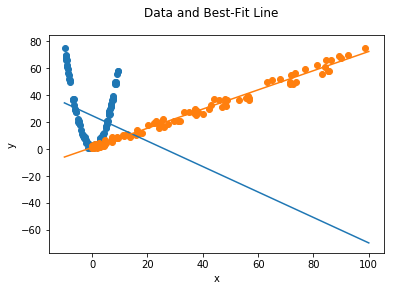

In [5]:
# Generate some normally distributed noise
noise = numpy.random.normal(size=100)

# randomly pick numbers for x
x2 = numpy.random.uniform(low=-10, high=10, size=(100, 1))

# get a 1D array of the input data
x2_1d = x2[:,0]

# y = 0.7x^2 - 0.4x + 1.5
y2 = 0.7 * x2_1d * x2_1d - 0.4 * x2_1d + 1.5 + noise

# use scikit-learn's linear regression model and fit to our data
model2 = linear_model.LinearRegression()
model2.fit(x2, y2)

# show results
print_model_fit(model2)
graph_one_input_model(model2, x2_1d, y2)

#code:
model6 = linear_model.LinearRegression()
y6 = y2
x6 = x2 * x2

model6.fit(x6, y6)

print_model_fit(model6)
graph_one_input_model(model6, x6, y6)

# Exercise Option (Advanced)

Get the linear regression to work better for dataset 2. There are a couple different ways to do this, but all of them will involve some new code. If you have ideas but just aren't sure how to translate them into code, please ask for help!

**Here blue represents the model before transformation, and the orange afterwards, where x<sup>2</sup> fits ~y<sup>2</sup> reasonably well, as the relationship is now linear. This techique is fantastic if you know what their relationship is likely to be, and makes analysis much more easy, but you have to know the broader function and degree.**

In [6]:
#Mostly from here I'm trying to do Lasso from here on out, mostly just to test
x10 = numpy.random.uniform(low=-10, high=10, size=(100, 1))

modelOther = linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

modelOther.fit(x10, y10)






NameError: name 'y10' is not defined

<br><br><br><br><br><br>

______________________________________________________________________________________________________________________
______________________________________________________________________________________________________________________


















## Dataset 3 (not worth reviewing)

Finally, let's look at a dataset has two inputs, like [the tree example in our notes](https://jennselby.github.io/MachineLearningCourseNotes/#linear-regression).

This will make it a littler harder to visualize, particularly because you cannot rotate the graph interactively in the Jupyter notebook. If you are interested in looking more closely at this graph, you can copy the code below (plus the code in the second and third code cells) into a file and run it through Python normally. This will open a graph window that will allow you to drag to rotate the graph.

In [7]:
# randomly pick pairs of numbers for x
# the 2 in the size is how we get pairs instead of single numbers
x3 = numpy.random.uniform(low=-10, high=10, size=(50, 2))

# Get a 1D array of each input
x3_1_1d = x3[:,0]
x3_2_1d = x3[:,1]

# y = 0.5x_1 - 0.2x_2 - 2
y3 = 0.5 * x3_1_1d - 0.2 * x3_2_1d - 2 + noise

# use scikit-learn's linear regression model and fit to our data
model3 = linear_model.LinearRegression()
model3.fit(x3, y3)

# Print out the parameters for the best fit plane
print('Intercept: {0}  Coefficients: {1}'.format(model3.intercept_, model3.coef_))

# 3D Plot
# create the figure
fig = matplotlib.pyplot.figure(1)
fig.suptitle('3D Data and Best-Fit Plane')

# get the current axes, and tell them to do a 3D projection
axes = fig.gca(projection='3d')
axes.set_xlabel('x1')
axes.set_ylabel('x2')
axes.set_zlabel('y')

# put the generated points on the graph
axes.scatter(x3_1_1d, x3_2_1d, y3)

# predict for input points across the graph to find the best-fit plane
# and arrange them into a grid for matplotlib
X1 = X2 = numpy.arange(-10, 10, 0.05)
X1, X2 = numpy.meshgrid(X1, X2)
Y = numpy.array(model3.predict(list(zip(X1.flatten(), X2.flatten())))).reshape(X1.shape)

# put the predicted plane on the graph
axes.plot_surface(X1, X2, Y, alpha=0.1)
   
# show the plots
matplotlib.pyplot.show()


ValueError: operands could not be broadcast together with shapes (50,) (100,) 

# Exercise Option (Standard Difficulty)

Answer the following questions about dataset 3:
1. What output did you expect to see printed if the linear regression code was working, and why?
1. What did you expect to see on the graph if the linear regression code was working, and why?
1. Pick some lines of code that you could change to continue testing that the linear regression worked properly. What lines did you choose and how did you change them? How did the output change, and why does that tell you that the code is working correctly?
1. Explain any differences you noticed between working with dataset 1 and dataset 3.